# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
! pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from imblearn.over_sampling import SMOTE

In [3]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [4]:
df.head(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High


In [5]:
for i in df.columns:
    print(f'Coluna {i}: {df[i].unique()}\n')

Coluna Age: [25. 30. 35. 40. 45. 50. 26. 31. nan 43. 48. 53. 29. 34. 39. 44. 49. 36.
 41. 46. 51. 27. 32. 37. 42. 47. 52. 28. 33. 38.]

Coluna Gender: ['Female' 'Male']

Coluna Income: ['50.000,00' '100.000,00' '75.000,00' '125.000,00' '150.000,00'
 '40.000,00' '60.000,00' '80.000,00' '105.000,00' '90.000,00' '135.000,00'
 '35.000,00' '55.000,00' '70.000,00' '95.000,00' '85.000,00' '30.000,00'
 '65.000,00' '115.000,00' '25.000,00' '45.000,00' '130.000,00'
 '155.000,00' '110.000,00' '140.000,00' '37.500,00' '57.500,00'
 '72.500,00' '32.500,00' '52.500,00' '67.500,00' '92.500,00' '82.500,00'
 '122.500,00' '27.500,00' '47.500,00' '62.500,00' '87.500,00' '77.500,00'
 '112.500,00' '117.500,00' '142.500,00' '160.000,00' '97.500,00'
 '145.000,00' '162.500,00' '120.000,00' '102.500,00' '137.500,00'
 '127.500,00' '82.000,00' '68.000,00']

Coluna Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Coluna Marital Status: ['Single' 'Married']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [7]:
df['Education'] = df['Education'].astype('category')
df['Credit Score'] = df['Credit Score'].astype('category')

In [8]:
# Arrumando a coluna Income
df['Income'] = df['Income'].str.replace('.', '').str.replace(',', '.').astype(float)

# Verificando a coluna Income
df['Income'].describe()

count       164.000000
mean      83765.243902
std       32457.306728
min       25000.000000
25%       57500.000000
50%       83750.000000
75%      105000.000000
max      162500.000000
Name: Income, dtype: float64

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [9]:
df.isna().sum() / len(df) * 100 

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [10]:
df.describe()

,Age,Income,Number of Children
count,130.000000,164.000000,164.000000
mean,37.507692,83765.243902,0.652439
std,8.500110,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.000000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [11]:
# Media e mediana são próximas, desvio padrão baixo, não há outliers, o que indica que a distribuição é normal. Então substituirei os valores nulos em idade pela média.
# Também arrumarei o tipo de dado da coluna Age para int.
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].astype(int)

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [12]:
for i in df.columns:
    print(f'Unicos na coluna {i} : {df[i].unique()}\n')

Unicos na coluna Age : [25 30 35 40 45 50 26 31 37 43 48 53 29 34 39 44 49 36 41 46 51 27 32 42
 47 52 28 33 38]

Unicos na coluna Gender : ['Female' 'Male']

Unicos na coluna Income : [ 50000. 100000.  75000. 125000. 150000.  40000.  60000.  80000. 105000.
  90000. 135000.  35000.  55000.  70000.  95000.  85000.  30000.  65000.
 115000.  25000.  45000. 130000. 155000. 110000. 140000.  37500.  57500.
  72500.  32500.  52500.  67500.  92500.  82500. 122500.  27500.  47500.
  62500.  87500.  77500. 112500. 117500. 142500. 160000.  97500. 145000.
 162500. 120000. 102500. 137500. 127500.  82000.  68000.]

Unicos na coluna Education : ['Bachelor's Degree', 'Master's Degree', 'Doctorate', 'High School Diploma', 'Associate's Degree']
Categories (5, object): ['Associate's Degree', 'Bachelor's Degree', 'Doctorate', 'High School Diploma', 'Master's Degree']

Unicos na coluna Marital Status : ['Single' 'Married']

Unicos na coluna Number of Children : [0 2 1 3]

Unicos na coluna Home Ownership : 

Aparentemente todas as colunas estao corretas

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [13]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.402439,83765.243902,0.652439
std,7.564625,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


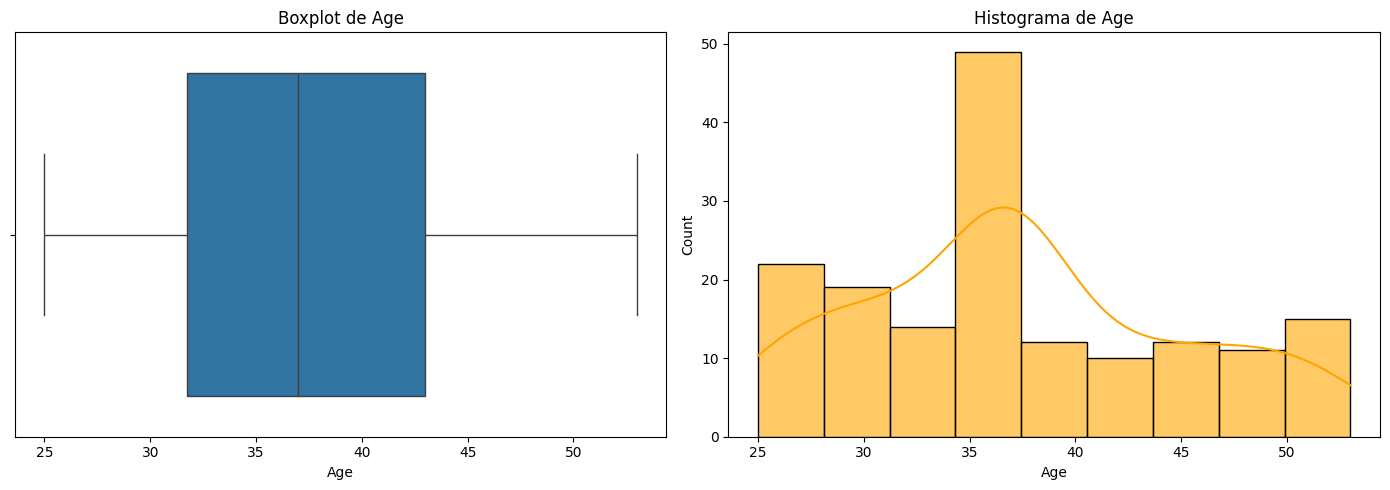

In [14]:
# Verificando outliers e distruibuição em Age
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot de Age')

sns.histplot(df['Age'], kde=True, ax=axes[1], color='orange', alpha=0.6)
axes[1].set_title('Histograma de Age')

plt.tight_layout()
plt.show()

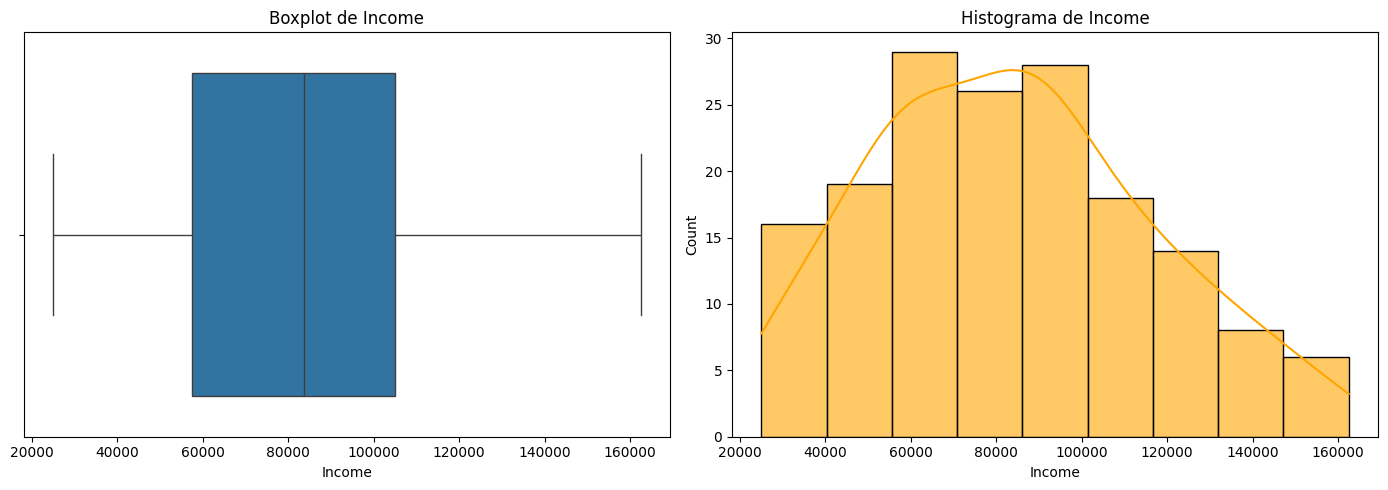

In [15]:
# Verificando outliers e distruibuição em Income
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.boxplot(x=df['Income'], ax=axes[0])
axes[0].set_title('Boxplot de Income')

sns.histplot(df['Income'], kde=True, ax=axes[1], color='orange', alpha=0.6)
axes[1].set_title('Histograma de Income')

plt.tight_layout()
plt.show()

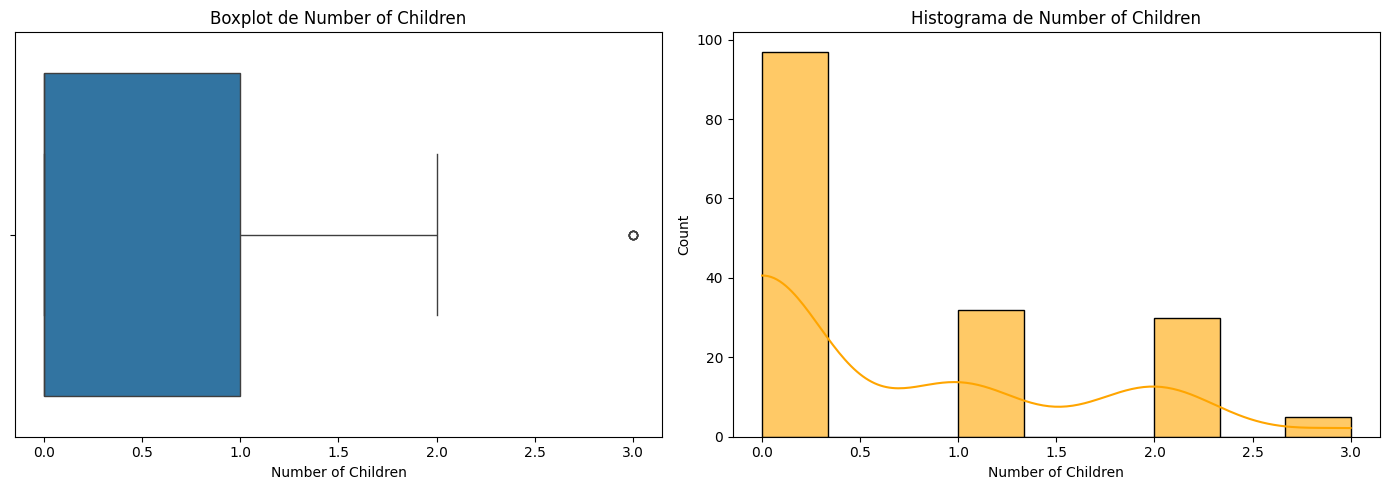

In [16]:
# Verificando outliers e distribuição em Number of Children
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.boxplot(x=df['Number of Children'], ax=axes[0])
axes[0].set_title('Boxplot de Number of Children')

sns.histplot(df['Number of Children'], kde=True, ax=axes[1], color='orange', alpha=0.6)
axes[1].set_title('Histograma de Number of Children')

plt.tight_layout()
plt.show()

As distribuições de Income e Age não seguem exatamente uma curva normal, mas os dados estão bem distribuídos, com a maioria dos valores concentrados ao redor da mediana. Isso indica uma certa simetria e ausência de distorções significativas.
No caso de Number of Children, a distribuição é mais assimétrica, o que é esperado devido à natureza discreta da variável e sua escala reduzida (de 0 a 4).
Não foram identificados outliers relevantes. Embora valores como 3 ou 4 filhos sejam menos frequentes, eles ainda estão dentro do intervalo esperado e, considerando o contexto da variável, não são considerados outliers reais.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

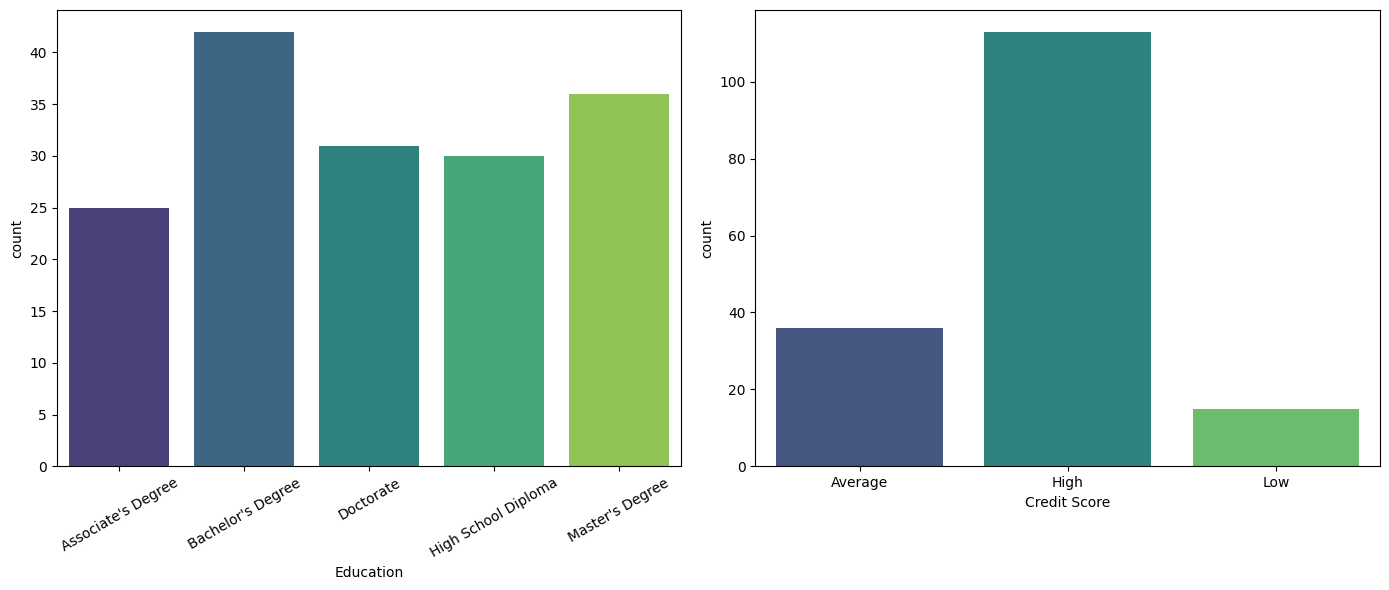

In [17]:
# Observando as distruibuições nas variáveis categóricas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

sns.countplot(x='Education', data=df, ax=axes[0], hue='Education', palette='viridis')
axes[0].tick_params(axis='x', rotation=30)  # rotaciona os textos do eixo x

sns.countplot(x='Credit Score', data=df, ax=axes[1], hue='Credit Score', palette='viridis')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


A variável nível de escolaridade está relativamente bem distribuída entre as categorias, com destaque para o bacharelado, que é o diploma mais frequente no conjunto de dados. Por outro lado, o menos comum é o Associate's Degree, equivalente ao tecnólogo no Brasil. Já na variável Credit Score, observa-se uma concentração significativa na categoria "High", que representa mais do que o dobro da frequência da segunda mais comum, "Average", indicando uma distribuição bastante assimétrica.

Text(0.5, 1.0, 'Distribuição de Gênero')

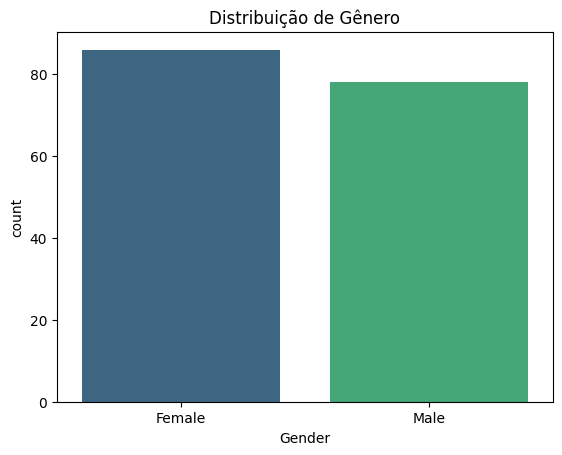

In [18]:
# Observando a distruibuição em gender  
sns.countplot(x='Gender', data=df, hue='Gender', palette='viridis')
plt.title('Distribuição de Gênero')

A distribuição em gênero é bem semelhante, onde Female é um pouco mais comum, mas sem grande disparidade.

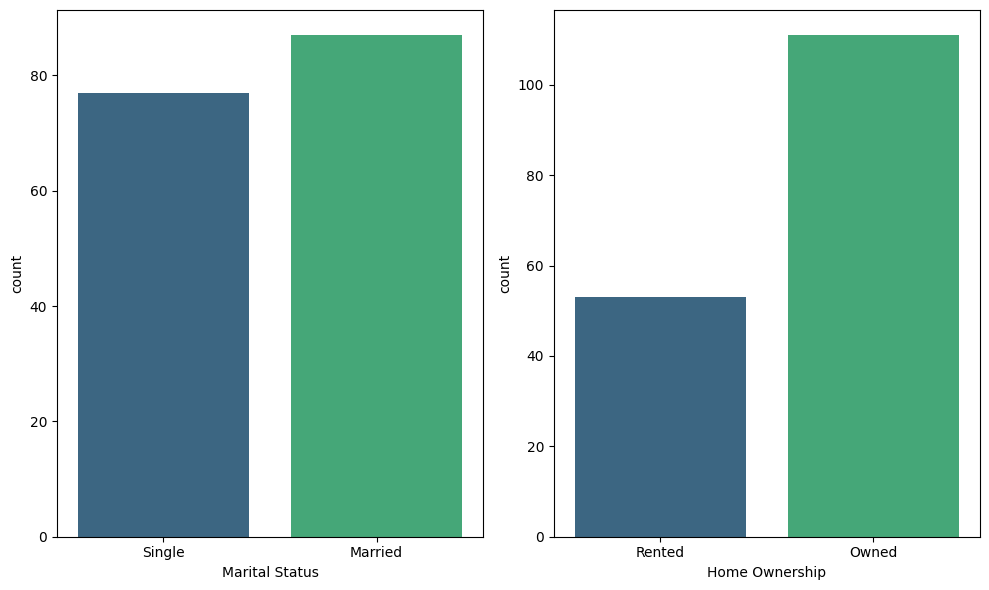

In [19]:
# Observando as distruibuições em marital status e home ownership
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # 1 linha, 2 colunas

sns.countplot(x='Marital Status', data=df, ax=axes[0], hue='Marital Status', palette='viridis')
axes[0].tick_params(axis='x') # rotaciona os textos do eixo x

sns.countplot(x='Home Ownership', data=df, ax=axes[1], hue='Home Ownership', palette='viridis')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

A variável Marital Status apresenta uma distribuição relativamente equilibrada, com uma leve predominância de pessoas casadas em relação às solteiras.
Já na variável Home Ownership, observa-se uma diferença mais marcante: a maioria dos indivíduos possui a casa onde mora, enquanto uma parcela significativamente menor vive em imóveis alugados, indicando uma concentração expressiva nessa categoria.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Não foram identificados outliers no dataset. A única variável que apresentou um possível indicativo foi "Number of Children", mas, como já mencionado, devido à sua escala reduzida e à natureza discreta da variável, esse indicativo pode ser considerado irrelevante. Valores como 3 ou 4 filhos são menos frequentes, mas ainda estão dentro do esperado e não configuram outliers reais.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



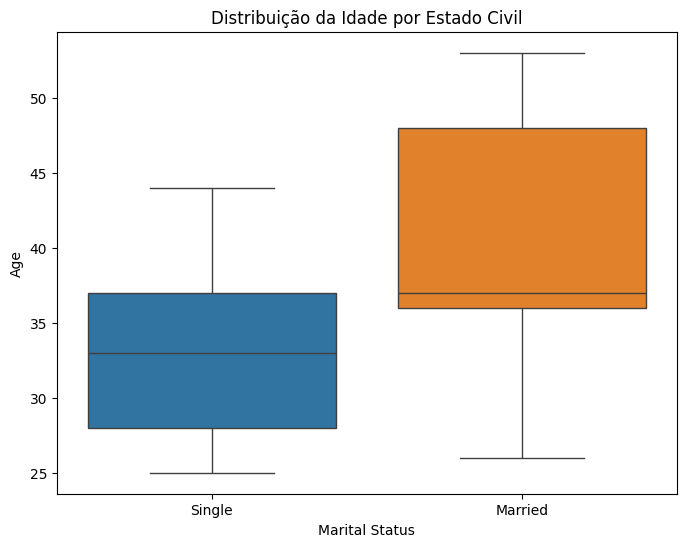

In [20]:
# Relação entre Marital Status e Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital Status', y='Age', data=df, hue='Marital Status')
plt.title('Distribuição da Idade por Estado Civil')
plt.show()

Pessoas casadas tendem a ter uma idade média mais alta do que pessoas solteiras, o que é esperado, já que o casamento geralmente ocorre em fases mais avançadas da vida.

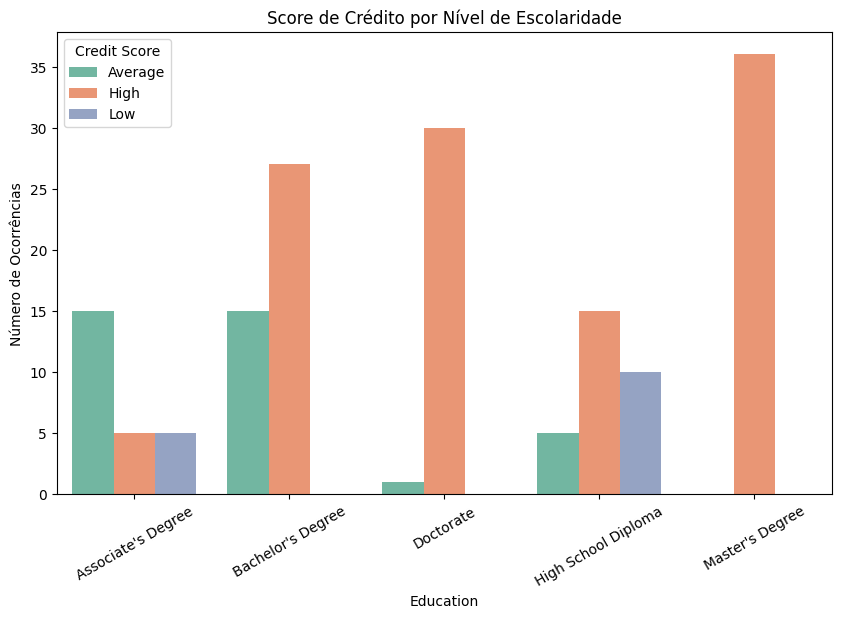

In [21]:
# Relação entre Education e Credit Score
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Credit Score', data=df, palette='Set2')
plt.xticks(rotation=30)
plt.title('Score de Crédito por Nível de Escolaridade')
plt.ylabel('Número de Ocorrências')
plt.show()

A análise mostra uma relação clara entre nível de escolaridade e score de crédito. Indivíduos com nível superior (Bachelor’s, Master’s e Doctorate) apresentam maior concentração no score "High", especialmente aqueles com mestrado, onde praticamente todos os registros estão nessa categoria. Já entre os que têm apenas ensino médio ou grau técnico (High School e Associate's Degree), a distribuição é mais dispersa, com presença relevante de scores "Average" e "Low". Isso sugere que maior escolaridade pode estar associada a um melhor comportamento de crédito, possivelmente por refletir maior estabilidade profissional e financeira.

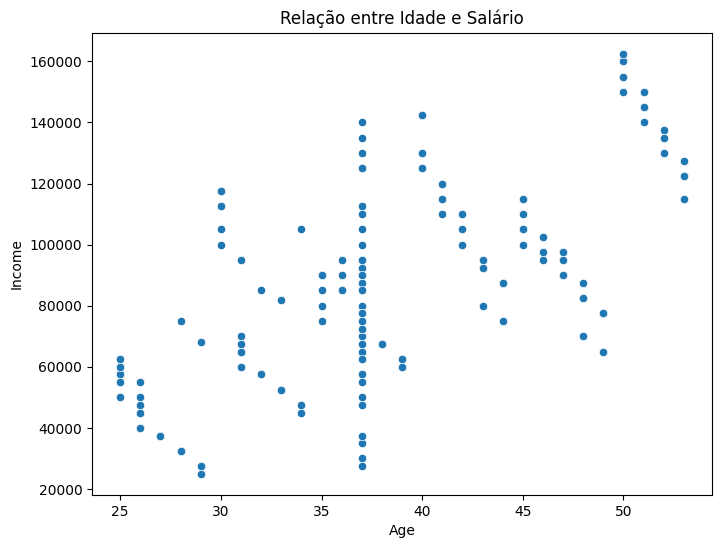

In [22]:
# Relação entre Age e Income  
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Relação entre Idade e Salário')
plt.show()

A distribuição dos dados indica que não há uma correlação linear clara entre idade e salário. No entanto, é possível observar que as faixas salariais mais altas tendem a se concentrar em idades mais elevadas, especialmente a partir dos 40 anos. Isso sugere que, embora o aumento da idade não garanta um aumento de salário, existe uma tendência geral de que profissionais mais experientes ocupem cargos de maior remuneração. Ainda assim, há uma grande variação salarial entre pessoas da mesma faixa etária, o que indica que fatores como formação, setor de atuação e cargo também desempenham um papel importante.

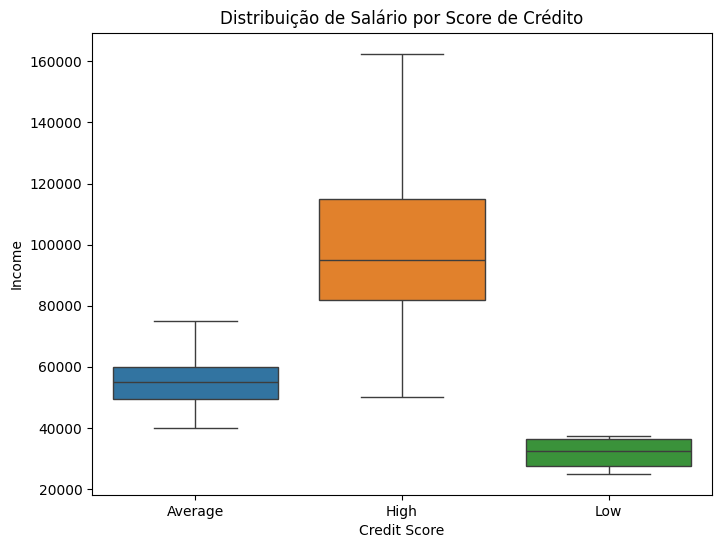

In [23]:
# Relação entre Credit Score e Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit Score', y='Income', data=df, hue='Credit Score')
plt.title('Distribuição de Salário por Score de Crédito')
plt.show()

Indivíduos com score de crédito alto apresentam uma média salarial mais alta em relação às outras categorias. Isso sugere que maior renda está associada a melhor score, o que é coerente com critérios usados em análises de crédito.

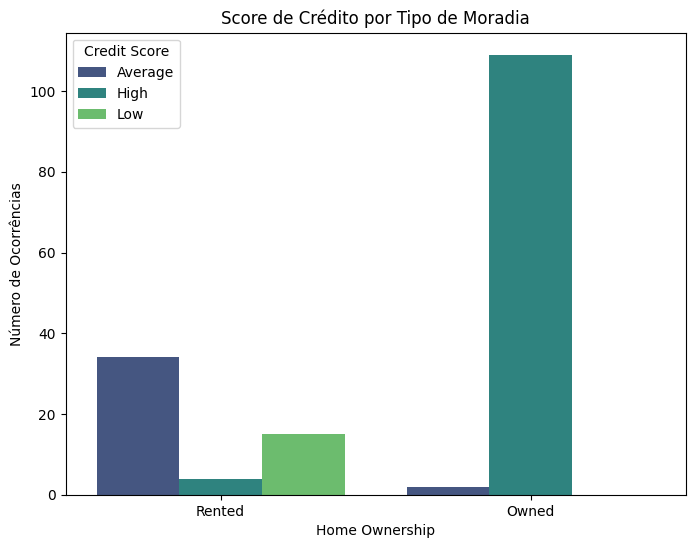

In [24]:
# Análise de Home Ownership e Credit Score
plt.figure(figsize=(8, 6))
sns.countplot(x='Home Ownership', hue='Credit Score', data=df, palette='viridis')
plt.title('Score de Crédito por Tipo de Moradia')
plt.ylabel('Número de Ocorrências')
plt.show()

A maioria dos indivíduos com casa própria se concentra na categoria de "High" score. Isso pode indicar que possuir um imóvel está associado a maior estabilidade financeira, refletindo positivamente no score de crédito.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

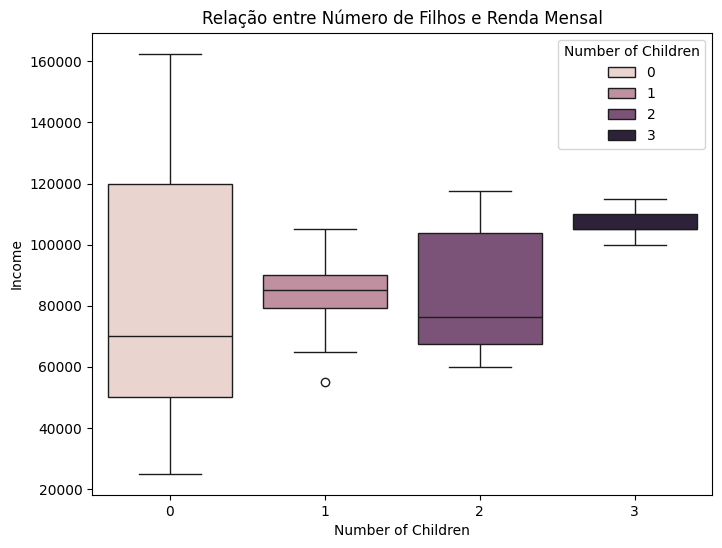

In [25]:
# Pessoas com filhos tendem a ter maior ou menor renda?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Number of Children', y='Income', data=df, hue='Number of Children')
plt.title('Relação entre Número de Filhos e Renda Mensal')
plt.show()

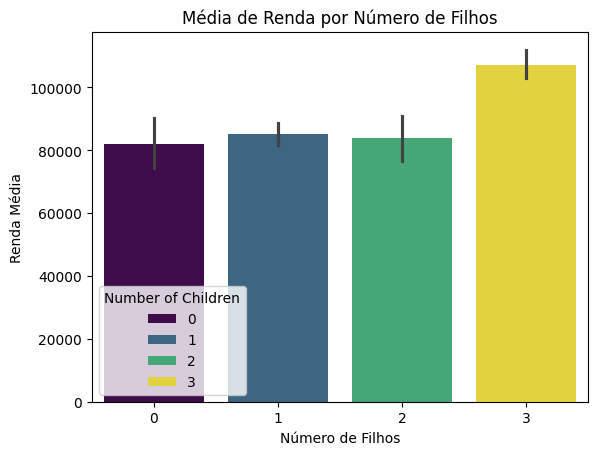

In [26]:
# Pessoas com filhos tendem a ter maior ou menor renda?
# Gráfico de barras com média de renda por número de filhos
sns.barplot(data=df, x='Number of Children', y='Income', estimator='mean', hue='Number of Children',palette='viridis')
plt.title('Média de Renda por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Renda Média')
plt.show()

Embora pessoas sem filhos apresentem grande variação salarial, aquelas com mais filhos, especialmente 3, tendem a ter rendas mais altas e estáveis. Isso sugere que ter mais filhos pode estar associado a maior estabilidade financeira ou maturidade profissional, ainda que não possamos afirmar uma relação causal.

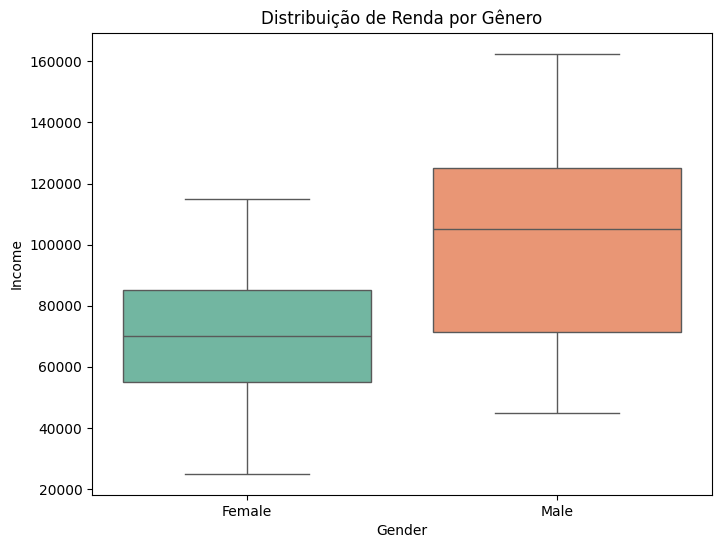

In [27]:
# Existe diferença de renda entre homens e mulheres?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Income', data=df, hue='Gender',palette='Set2')
plt.title('Distribuição de Renda por Gênero')
plt.show()

Homens, em média, possuem rendas mais altas que mulheres, mesmo representando uma parcela menor da amostra, isso é visível tanto pela mediana mais elevada quanto pela maior amplitude de rendas entre os homens.

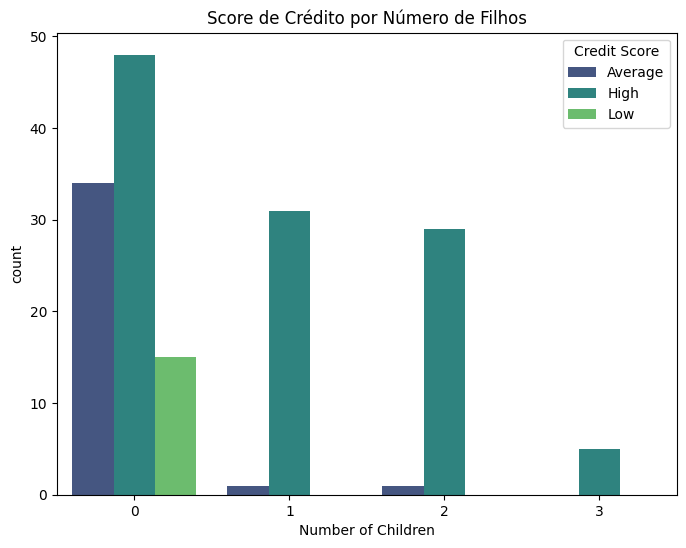

In [28]:
# O número de filhos influencia o Score de Crédito?
plt.figure(figsize=(8, 6))
sns.countplot(x='Number of Children', hue='Credit Score', data=df, palette='viridis')
plt.title('Score de Crédito por Número de Filhos')
plt.show()

A maioria das pessoas com poucos ou nenhum filho está concentrada na categoria "High" de score de crédito. À medida que o número de filhos aumenta, parece haver uma leve tendência de queda na proporção de scores mais altos, possivelmente refletindo maior pressão financeira.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [29]:
df.select_dtypes(include='number').corr()

,Age,Income,Number of Children
Age,1.000000,0.621599,0.071556
Income,0.621599,1.000000,0.084547
Number of Children,0.071556,0.084547,1.000000


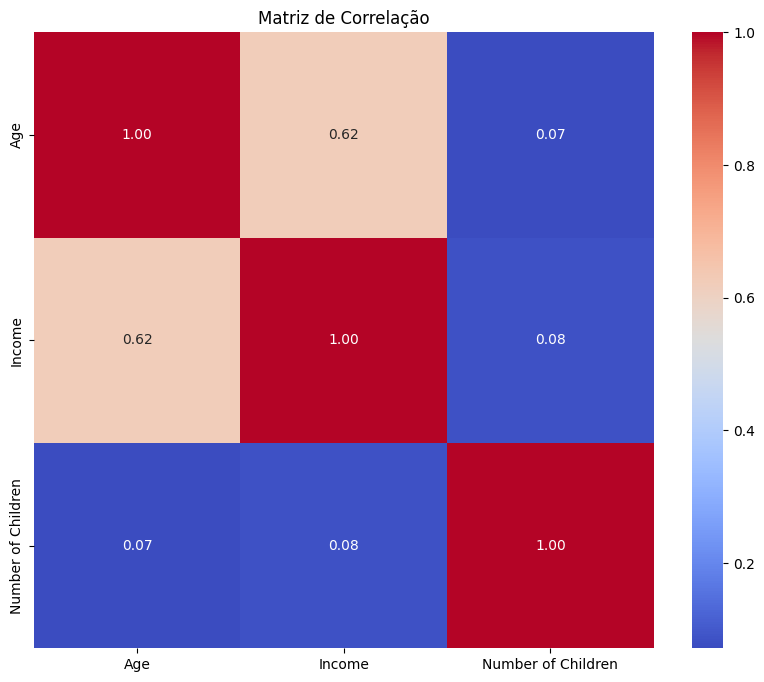

In [30]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Sim, a variável Age apresenta uma correlação moderada com Income (0.62), o que indica que, de forma geral, pessoas mais velhas tendem a ter rendas maiores. Esse comportamento faz sentido, pois à medida que os indivíduos avançam na carreira, adquirem mais experiência, assumem cargos mais elevados e, consequentemente, recebem salários maiores.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [31]:
for i in df.columns:
    print(f'Unicos na coluna {i} : {df[i].unique()}\n')

Unicos na coluna Age : [25 30 35 40 45 50 26 31 37 43 48 53 29 34 39 44 49 36 41 46 51 27 32 42
 47 52 28 33 38]

Unicos na coluna Gender : ['Female' 'Male']

Unicos na coluna Income : [ 50000. 100000.  75000. 125000. 150000.  40000.  60000.  80000. 105000.
  90000. 135000.  35000.  55000.  70000.  95000.  85000.  30000.  65000.
 115000.  25000.  45000. 130000. 155000. 110000. 140000.  37500.  57500.
  72500.  32500.  52500.  67500.  92500.  82500. 122500.  27500.  47500.
  62500.  87500.  77500. 112500. 117500. 142500. 160000.  97500. 145000.
 162500. 120000. 102500. 137500. 127500.  82000.  68000.]

Unicos na coluna Education : ['Bachelor's Degree', 'Master's Degree', 'Doctorate', 'High School Diploma', 'Associate's Degree']
Categories (5, object): ['Associate's Degree', 'Bachelor's Degree', 'Doctorate', 'High School Diploma', 'Master's Degree']

Unicos na coluna Marital Status : ['Single' 'Married']

Unicos na coluna Number of Children : [0 2 1 3]

Unicos na coluna Home Ownership : 

In [32]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Ordens definidas manualmente
education_order = [
    'High School Diploma',
    "Associate's Degree",
    "Bachelor's Degree",
    "Master's Degree",
    'Doctorate'
]
score_order = ['Low', 'Average', 'High'] 

# Colunas para OneHotEncoding
colunas_oneHot = ['Gender', 'Marital Status', 'Home Ownership']

# OneHotEncoder com drop='first'
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# OrdinalEncoder para variáveis ordenadas
ordinal_encoder_education = OrdinalEncoder(categories=[education_order])
ordinal_encoder_score = OrdinalEncoder(categories=[score_order])

# Aplicando em Education
df['Education'] = ordinal_encoder_education.fit_transform(df[['Education']]).astype(int)

# Aplicando em Credit Score (somente se **não for** a variável target)
df['Credit Score'] = ordinal_encoder_score.fit_transform(df[['Credit Score']]).astype(int)

# Aplicando OneHot nas demais
for coluna in colunas_oneHot:
    onehot = pd.DataFrame(
        one_hot_encoder.fit_transform(df[[coluna]]),
        columns=one_hot_encoder.get_feature_names_out([coluna]),
        index=df.index
    )
    df = pd.concat([df.drop(columns=[coluna]), onehot], axis=1)


In [33]:
df.head(5)

,Age,Income,Education,Number of Children,Credit Score,Gender_Male,Marital Status_Single,Home Ownership_Rented
0,25,50000.0,2,0,2,0.0,1.0,1.0
1,30,100000.0,3,2,2,1.0,0.0,0.0
2,35,75000.0,4,1,2,0.0,0.0,0.0
3,40,125000.0,0,0,2,1.0,1.0,0.0
4,45,100000.0,2,3,2,0.0,0.0,0.0


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [34]:
df.corr().round(2)  

,Age,Income,Education,Number of Children,Credit Score,Gender_Male,Marital Status_Single,Home Ownership_Rented
Age,1.00,0.62,0.18,0.07,0.57,0.20,-0.45,-0.63
Income,0.62,1.00,0.25,0.08,0.74,0.50,-0.47,-0.70
Education,0.18,0.25,1.00,0.32,0.54,-0.08,-0.34,-0.49
Number of Children,0.07,0.08,0.32,1.00,0.43,-0.44,-0.70,-0.50
Credit Score,0.57,0.74,0.54,0.43,1.00,0.19,-0.62,-0.85
Gender_Male,0.20,0.50,-0.08,-0.44,0.19,1.00,0.28,-0.03
Marital Status_Single,-0.45,-0.47,-0.34,-0.70,-0.62,0.28,1.00,0.71
Home Ownership_Rented,-0.63,-0.70,-0.49,-0.50,-0.85,-0.03,0.71,1.00


Text(0.5, 1.0, 'Matriz de Correlação')

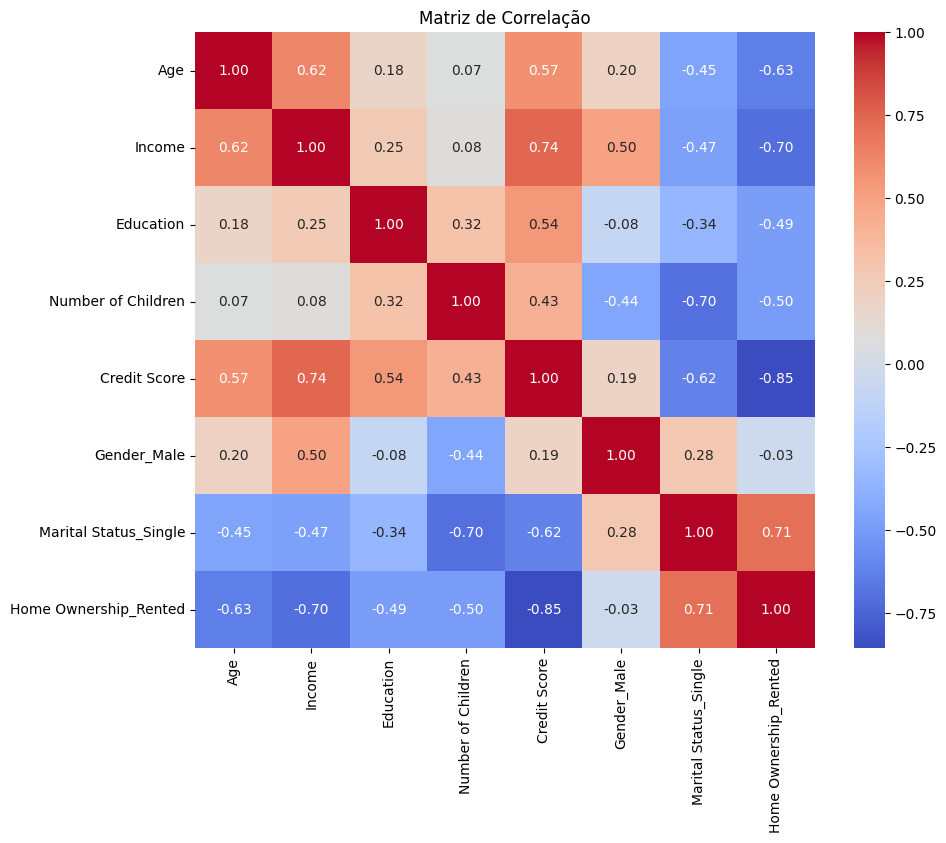

In [35]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')


### Sim, a matriz de correlação apresenta várias relações com correlação moderada a alta, tanto positivas quanto negativas. Vamos destacar as principais:

#### **- Correlações altas e positivas (acima de 0.5):**
##### **Income e Credit Score (0.74)**

Uma das correlações mais fortes. É esperado que pessoas com maior renda tenham melhor score de crédito, já que possuem maior capacidade de pagar dívidas em dia, menor uso proporcional do crédito e histórico financeiro mais sólido.

##### **Education e Credit Score (0.54)**

Pessoas com maior nível educacional tendem a ter maior conhecimento e organização financeira, o que pode levar a melhores práticas de crédito e, consequentemente, a um score mais alto.

##### **Age e Credit Score (0.57)**

A idade se correlaciona positivamente com o score de crédito, pois pessoas mais velhas geralmente têm um histórico de crédito mais longo, fator importante para o cálculo do score.

##### **Income e Gender_Male (0.50)**

Indica que, na amostra, homens tendem a apresentar rendas mais altas. Isso pode refletir desigualdades salariais estruturais ou diferenças nas profissões predominantes entre os gêneros.

#### **- Correlações altas e negativas (abaixo de -0.5):**
##### **Credit Score e Home Ownership_Rented (-0.85)**

Fortíssima correlação negativa. Pessoas que moram de aluguel tendem a ter score de crédito mais baixo. Isso faz sentido, pois quem possui um imóvel (em vez de alugar) normalmente apresenta maior estabilidade financeira, o que contribui para um bom score.

##### **Income e Home Ownership_Rented (-0.70)**

Reforça a ideia de que renda mais baixa está associada ao aluguel, devido à dificuldade em adquirir um imóvel com renda limitada.

##### **Marital Status_Single e Number of Children (-0.70)**

Solteiros tendem a ter menos filhos. Essa é uma relação esperada, pois decisões familiares (como ter filhos) geralmente ocorrem mais frequentemente em contextos de relacionamentos estáveis.

##### **Home Ownership_Rented e Age (-0.63)**

Pessoas mais jovens tendem a alugar, o que é socialmente coerente, visto que comprar um imóvel exige tempo, estabilidade financeira e planejamento.

##### **Credit Score e Marital Status_Single (-0.62)**

Estar solteiro aparece negativamente correlacionado com o score, talvez por estar relacionado a menos estabilidade financeira ou menor responsabilidade compartilhada.



#

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [36]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split

X = df.drop('Credit Score', axis=1)
y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(131, 7) (33, 7) (131,) (33,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit Score', ylabel='count'>

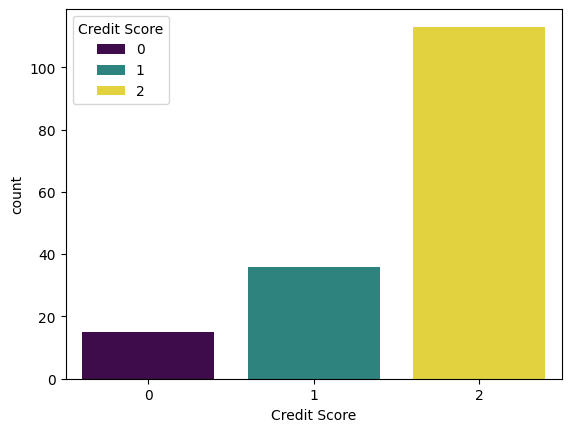

In [38]:
# analisando se a coluna Credit Score está balanceada
sns.countplot(x='Credit Score', data=df, hue='Credit Score',palette='viridis')


A variavel de Credit Score está extremamente desbalanceada, a classe 2 ou High Score predomina a concentração dos dados, um balanceamento se mostra crucial para evitar viéses na base de dados

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [39]:
# Realizando o balanceamento da coluna Credit Score na base de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)   
print(f'X_train_balanced shape: {X_train_balanced.shape}')
print(f'y_train_balanced shape: {y_train_balanced.shape}')

X_train_balanced shape: (270, 7)
y_train_balanced shape: (270,)


In [40]:
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)